In [2]:
import perceval as pcvl
import numpy as np
from perceval.algorithm import Sampler
from perceval.components.unitary_components import PS, BS, PERM

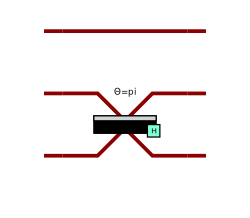

In [30]:
def initialize_processor(old_result=None, new_data_normalized=np.array([0.5]), num_ancillas=1, N=None):
    """
    Parameters
    ----------
    old_result : list of int
        The result of the previous iteration. If None, then N must be specified.
    new_data_normalized : np.array
        The new data, normalized to [0, 1].
    num_ancillas : int
        The number of ancillas to use.
    N : int
        The number of data points if old_result is None.
    
    Returns
    -------
    processor : Processor
        The processor that prepares the state.
    """
    
    
    assert num_ancillas == np.atleast_1d(new_data_normalized).shape[0]
    assert np.all(0 <= new_data_normalized <= 1)
    if old_result is None:
        assert N is not None
        old_result = [1 for _ in range(N)]
    
    new_data_normalized = np.atleast_1d(new_data_normalized)
    processor = pcvl.Processor("SLOS", len(old_result) + 2*num_ancillas)
    processor.with_input(pcvl.BasicState(old_result + num_ancillas*[1, 0]))
    for i in range(num_ancillas):
        processor.add(len(old_result) + 2*i, BS.H(theta=np.pi*new_data_normalized[i]))
    return processor

p = initialize_processor([2], 1, 1)
pcvl.pdisplay(p)






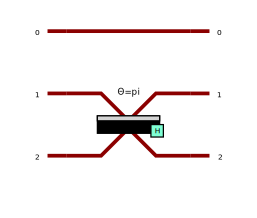

In [33]:
def initialize_circuit(old_result=None, new_data_normalized=np.array([0.5]), num_ancillas=1, N=None):
    """
    Parameters
    ----------
    old_result : list of int
        The result of the previous iteration. If None, then N must be specified.
    new_data_normalized : np.array
        The new data, normalized to [0, 1].
    num_ancillas : int
        The number of ancillas to use.
    N : int
        The number of data points if old_result is None.
    
    Returns
    -------
    processor : Processor
        The processor that prepares the state.
    """
    
    
    assert num_ancillas == np.atleast_1d(new_data_normalized).shape[0]
    assert np.all(0 <= new_data_normalized <= 1)
    if old_result is None:
        assert N is not None
        old_result = [1 for _ in range(N)]
    
    new_data_normalized = np.atleast_1d(new_data_normalized)
    circuit = pcvl.Circuit(len(old_result) + 2*num_ancillas)
    for i in range(num_ancillas):
        circuit.add(len(old_result) + 2*i, BS.H(theta=np.pi*new_data_normalized[i]))
    return circuit

p = initialize_circuit([2], 1, 1)
pcvl.pdisplay(p)






[Parameter(name='theta_val', value=None, min_v=0.0, max_v=12.566370614359172)]
